### Your name goes here!


# Python Introduction

Learn how to use the AguaClara code distribution and python to design and learn!
The [AguaClara code documentation](https://aguaclara.github.io/aguaclara/index.html) will be helpful as you search for useful functions.

See [this introduction to using the AguaClara package](https://github.com/AguaClara/CEE4520/wiki/Using-the-AguaClara-Package).

The [Python Tutorial in the AguaClara textbook](https://aguaclara.github.io/Textbook/Introduction/Python_Tutorial.html) provides examples and guidelines for coding and for using the AguaClara package.

Make sure you have clicked on the flask in the upper right and opted in to the new Colab editor. The new Colab editor will help you find functions with a popup menu showing what functions are available.

Don't break dependency! That means that you don't type the result of a calculation into the next calculation. Instead, use variables so that if an input changes it follows through in all subsequent calculations.

In [0]:
#imports
!pip install aguaclara
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt

### Example

What is the density of water at 15$^\circ$C? Use the AguaClara function.

```
ac.density_water(Water_Temp)
```
Print a statement that reports the temperature and the density.


In [0]:
Water_Temp = 15 * u.degC
Water_Density = ac.density_water(Water_Temp)
print('The density of water at',Water_Temp,'is',Water_Density)


The density of water at 15 degC is 999.1 kilogram / meter ** 3


What is the density of water at 15$^\circ$C in $\frac{lbs}{ft^3}$? Use 
```
Water_Density.to(u.lb/u.ft**3)
```
to convert to the desired units.

In [0]:
print('The density of water at',Water_Temp,'is',Water_Density.to(u.lb/u.ft**3))

The density of water at 15 degC is 62.37 pound / foot ** 3


Plot the density of water as a function of temperature from 0.1$^\circ$ to 30$^\circ$.

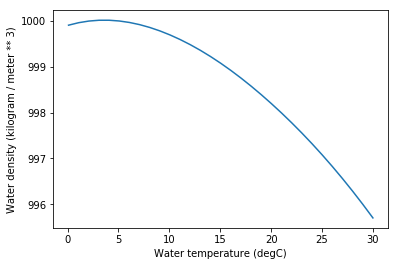

In [0]:
n_points = 31
T_Graph = (np.linspace(0.1,30,n_points))*u.degC
#create unit strings that can be used for axis labels.
x_units = T_Graph.units
y_units = u.kg/u.m**3
Density_Graph = ac.density_water(T_Graph)

plt.plot(T_Graph,Density_Graph)
plt.xlabel('Water temperature (' + str(x_units) + ')')
plt.ylabel('Water density (' + str(y_units) + ')')
plt.show()

### 1)
Plot the kinematic viscosity of water as a function of temperature from 0.1$^\circ$ to 30$^\circ$.

Take note of the following!

Normally with a function that is designed for a scalar it would be necessary to take the following steps to obtain an array of values
* create a numpy array over a range and then assign units to that array
* create an empty numpy array with the appropriate units BEFORE assigning elements with units to the array.
* get the unit string so that it can be placed in the x and y axis labels of the graph
* use a for loop to calculate the viscosity at each temperature.

But the aguaclara codebase has a wrapper function that allows scalar functions automatically handle arrays. Thus for this problem the previous steps aren't necessary. You can simply pass an array of temperatures to the ac.viscosity_kinematic_water function. 

In [0]:
#answer

### 2)
What is the maximum surface loading for plate or tube settlers for fast settling flocs in $\frac{gpm}{ft^2}$? See [MWH’s Water Treatment: Principles and Design, Third Edition](https://onlinelibrary-wiley-com.proxy.library.cornell.edu/doi/10.1002/9781118131473.ch10). Note that the surface loading rate is equivalent to upflow velocity.
Convert that value to mm/s.
Convert to L/s per square meter.
Use print statements!

In [0]:
#answer

### 3)
The flow rate for the proposed Fairmont Sedimentation Plant is 720 $\frac{ft^3}{s}$. What is the plan view area of the sedimentation tanks if you use the maximum surface loading? Report the area in $m^2$.

In [0]:
#answer

### 4)
If the sedimentation tanks occupy a square tract of land, how long is one side of the square? Note that we are completely ignoring how we will get the water into and out of these tanks and the area required for those flow channels at this stage!

In [0]:
#answer

# Mechanical Flocculation

Design a mechanical flocculator and power unit. Use the Fairmont Sedimentation Plant flow rate as the default design value. The coldest temperature that the raw water is expected to have is 10°C.   

As you define variables, take care not to redefine parameters. One trick is to use a unique name for variables that are estimates. We often add "est" to any variable names that aren't the final values. 




## Conventional Design Guidelines:

This table for mechanical flocculators is taken from Sincero and Sincero's 1996 textbook: *Environmental Engineering: A Design Approach *

Type | Velocity Gradient (G) (1/s) | Energy Dissipation Rate | Gt | t (min)
:---: | :---: | :---: | :---: | :---: 
Low turbidity, color removal | 20-70 | 0.4 - 4.9 | 50,000 - 250,000 | 11 - 210
High turbidity, solids removal | 70 - 180 | 4.9 - 32 | 80,000 - 190,000 | 7 - 45

Dissolved organic matter impacts the color of the water. Perhaps the reason for lower G values for color removal is because flocs created from dissolved organic matter are weaker or less dense. Hence, a lower G is needed to allow them to grow large enough for removal in the sedimentation tank. This is important for traditional sedimentation tanks that aren't designed to include floc blankets.

Mechanical Flocculator Design:
The conventional design guidelines provide a range of values with little guidance on how to select "velocity gradient" or G values. One approach is to hope for the best and choose a G value in the middle of the range. We will pick the G value that is apparently appropriate for both low and high turbidity waters.

In [0]:
G_mech = 70 / u.s
temp_design = 10 * u.degC

### 5)
The Ten State Standards (with the hilarious acronym GLUMRB) requires the residence time in a mechanical flocculator to be 30 minutes. What is the value of Gt if you use the velocity gradient given above as G_mech?

Note: .to(u.dimensionless) ensures you don't get weird dimensions like kilometer/inch or minute/second for dimensionless parameters.

In [0]:
#answer

### 6)

Create a function to calculate the power requirement for mechanical flocculators. Then, use your function to obtain the power requirement for the design temperature. 

In [0]:
#answer

### 7)
How much energy in Joules per liter would be required to treat the water using this mechanical flocculator?

In [0]:
#answer

### 8)

How much does the electricity cost per million liters? It isn't necessary to actually size an electric motor for this assignment. Simply use the shaft power and assume a motor efficiency of 80%. You may assume the price of electricity is $0.15 per Kw-hr. Note that USD is a unit!

In [0]:
#answer

It doesn't actually cost very much to flocculate water using electricity.

### 9)

How much will the electricity cost to flocculate water at the Fairmont Sedimentation Plant?

In [0]:
#answer

### 10)

What is the equivalent amount of potential energy that is used to operate this mechanical flocculator (the shaft power) expressed as an elevation drop in meters?

In [0]:
#answer

### 11)

What is the required reactor volume for the mechanical flocculator?

In [0]:
#answer

### 12)

If this flocculator is 4 m deep, then how many square meters of plan view area are required per L/s of flow capacity? This is a measure of required size of this unit process. For comparison, an AguaClara sedimentation tank requires about $\frac{1m^{2}}{L/s}$ and are only 2 m deep.

In [0]:
#answer

The required plan view area is 9175 meter ** 2


### 13)

What is the process velocity (Flow rate over the plan view area) for these flocculators?

In [0]:
#answer

### 14)
Which process is faster: flocculation or sedimentation?

#answer